# CS-EJ3311 - Deep Learning with Python, 09.09.2020-18.12.2020
## Round 3 - Convolutional Neural Networks 

B. Karki, J.P. Bartaula and A. Jung

Aalto University (Espoo, Finland)
fitech.io (Finland)


In the previous round (Round 2 - "ANN"), you have applied simple artifical neural networks to classify images. This rounds discusses a particular class of ANN that is well suited for image data. This particual class of ANN is known as convolutional neural networks (CNN). A CNN is a special case of an ANN that contains several convolutional layers. We can think of a convolutional layer as implementating a search for a specific reference pattern ("kernel") in an image. Such a reference pattern could be a simple geometric shape such as a circle or a higher-level concept such as a tree. 

Learning goals:

- understand the basic principles of convolutional layers
- understand the basic principles of a pooling layer 
- learn how a CNN is constructed by combining convolutional layers
- how to use the "padding" and "stride" parameters in CNN
- how to determine CNN parameters required for a given data set
- how to visualize the activations (outputs) of different neurons within a CNN

## Recommended Reading

- Deep Learning with Python F.Chollet, [chapter 5](https://livebook.manning.com/book/deep-learning-with-python/chapter-5)

## Additional Material (Optional!)

- Have fun with [interactive CNN](https://poloclub.github.io/cnn-explainer/)
- [Max pooling layer, Andrew Ng](https://www.youtube.com/watch?v=XTzDMvMXuAk)
- Convolutional Neural Networks [Standford, CS231n](http://cs231n.github.io/convolutional-networks/)

# Convolutional Neural Network (CNN) 

In the previous round, we used an ANN to predict the label indicating a category of fashion items based on an image. There, we have used an ANN consituted by dense layers (https://keras.io/api/layers/core_layers/dense/) with each neuron of the layer connected to each neuron in the preceding layer. 

Consider an ANN applied to images with a (rather low) resolution of $200 \times 200$ pixels. Let us assume we a hidden layer consisting of only $128$ neurons. We would then already obtain $200 \times 200 \times 128$ tunable weights for this single hidden layer. 

As a rule of thumb, it is good to have at least ten times more labeled data points for training a model without any further assumptions. Thus, for the ANN with a single dense layer, we would need around $$10 \times 200 \times 200 \times 128 = 51200000$$ fashion item images for which we know the true category. This exceed significantly the number of training samples in the [fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) dataset. 

When developing a deep learning method we often have different options for improving the performance. One option is collect more training data, i.e., manually label more images of fashion items. In this round we focus on another option which is to reduce the number of tunable parameters (weights) in the ANN. 

It turns out that using dense layers for image data is not very efficient since natural images have a lot of structure. Convolutions neural networks (CNN) exploit this structure by using fewer connections between layers compared to dense layers. In particular, we can think of the neurons in a hidden layer of a CNN to represent the presence of a reference patter at a certain location in the image. Since the reference patterns, which we refer to ask kernels, only cover a small area (patch) of the original image we only need connections between the neuron of a hidden layer and a small set of neurons in the previous layer. This small set correspond to a small patch of the image. 


A CNN consists of sequence of a different kinds of layers. There are three main types of layers in CNN:
- Convolution layer (conv)
- Pooling layer (pooling)
- Fully connected Layer (FC)

A typical CNN architecture looks like this: 

<figure>
    <img src='./convolution/cnn.png'  width="600" />
    <figcaption style="text-align:center"> 
        <a href="https://cezannec.github.io/Convolutional_Neural_Networks/">Image source</a>
    </figcaption>
</figure>


First, let's first see what are the input and convolution layers in CNN.

### Input Layer

In the previous round we have "flattened" the image of a fashioned item. Flattening refers to the process of stacking the image pixel intensities into a one-dimensional feature vector. When handling a lot image data, it can be more convenient to use a representation that makes the different colour channels explicit. 

A very useful representation of image and video data is in the form of tensors. A tensor is a multidimensional array of numbers. For the special case of two dimensions, tensors become matrices and for one dimension, tensors become vectors. In particular, we can represent a RGB colour image with $128 \times 128$ pixels by a three-dimensional tensor of shape $(128,128,3)$. 

See below an example input to CNN - an image matrix (volume) of a dimension 4x4x3. \
$ $

<figure>
    <img src='./convolution/volume.png'  width="400" />
    <figcaption style="text-align:center"> 
        <a href="https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53">Image source</a>
    </figcaption>
</figure>

### Convolution Layer

The core building block of a CNN is a convolutional layer. A convolutional layer computes, for each small area (patch) of the image, the similarity between this patch and a reference pattern (kernel). Mathematically, this computation amounts to a convolution of the image with the kernel. The reference image (kernel) is typcially much smaller (few pixels only) compared to the original image. 

Consider a gray scale image of shape $5 \times 5 \times 1$ (height/weight/channels) and a kernel of size $3 \times 3 \times 1$. For each location in the original image, we compute the sum of the element-wise products between filter and image pixel values:

`1*1 + 2*3 + 3*5 + 2*2 +0*(-1) + 0*9 + 3*1 + 4*1 + 4*(-1) = 29`

<img src="./convolution/c1.png" width="400">

Next, kernel slides to right by 1 pixel and produces the new value of a feature map as shown below. 

<img src="./convolution/c2.png" width="400">

In similar fashion, kernel slides over the whole images (right and down) and produces a complete feature map.

<img src="./convolution/c3.png" width="400">


Note that the resulting ouput image is a bit smaller than the input image due to border effects. Each pixel of the output image represents the similarity between the reference pattern (kernal) and the corresponding area (patch) in the origin image. The ouput image obtained form convolutional layer is sometimes referred to as **activation map or feature map**. This is because we could use this ouput as new feature "vector" for a following machine learning method such as linear or logistic regression. 

The convolution layer in CNN acts as an **feature extraction** layer. The filter learn the particular feature from the image. Therefore,  convolution layer does not  have only single filter, but many, in order to learn multiple features in parallel for a given input.\
In CNN, filters are initialized randomly and become parameters (weights) which will be subsequently learnt by the network.

The important thing to remember while doing convolution operation is that the the depth of a filter/kernel should  match that of the input depth. If you have an image of volume 5x5x3 as an input (where 3 represents 3 color channels: red, blue and green), filter should also be of same depth, for example 3x3x3. 

<img src="./convolution/c4.png" width="600">

Above we saw that kernel is traversing across the image by one pixel at a time. We call a number of pixel(or step size) by which kernel traversed in each slide a **stride**. \
Also, we saw that the size of the output from convolution operation, i.e feature map, is smaller than the input image size. This means that we are losing some pixel values around the perimeter of image. Since CNN might consists of many convolutional layers, loss of pixels values in each successive convolution layer might result in a loss of important features from the image. To get the input sized output, we employ a technique called **zero padding**. Padding is a technique in which we add zero valued pixel around the image symmetrically. 

Below you can see an example of zero padding, where size of zero padding is one.

<img src="./convolution/padding.png" width="400">

In order to get the output volume of same spatial dimension as input volume given the **stride=1**, we can find the size of zero padding needed with following formula: 

<center> zero padding size = $\large\frac{(F-1)}{2}$ </center>
<center>where $F$ is filter/kernel size</center>

The animation below illustrates how the output is calculated for an MxNx3 image and 3x3x3 kernel:

<img src="./convolution/cnn.gif" width="800">   

Here is an animated example of mutlifilter multichannel convolution operation involving 2 kernels in 3 channeled image:\
\
$ $

<figure>
    <img src="./convolution/standford_CNN.gif"
         width="800">
    <figcaption style="text-align:center">Convolution demo from <a href="http://cs231n.github.io/convolutional-networks/">Standford CS231n course</a>
         with K=2, F=3, S=2 and P=1 
        Where:
        <ul>
  <li>K = Number of filters</li>
  <li>F = filter size</li>
  <li>S = stride length</li>
  <li>P = amount of zero padding </li>
</ul> 
</figcaption>
</figure>

<br>

The above animation illustrates the application of a convolutional layer to a zero padded 7x7x3 input image and with a kernel of size 3x3x3 (note that the depth of the convolution filter matches the depth of the image, both being 3). When the kernal is shifted to a particular location in the input image, it covers a small volume of the input (receptive field) and performs convolution operation with this input. We sum up results of convolutions from all channels (and in this case, we also added bias term) for each location.

Since 3D volumes are difficult to visualize, the input volume (blue), the kernel volume (red), and the output volume (green) are depicted row-wise. The filter slides over the input and performs the convolution at every location aggregating the result in a feature map. 

This feature map is of size 3x3x1, shown as the green slice on the right. Since we used 2 different filters we  have 2 feature maps of size 3x3x1 and stacking them along the depth dimension would give us the final output of the convolution layer: a volume of size 3x3x2. 

In contrast to dense layers, which learn global patterns in their input feature space, convoluational layers aim at detecting localized patterns. Since we compare each area of the original image with the same reference pattern (kernel), the overall behavior of a CNN tends to become **translation invariant**. This makes very much sense for natural images as a translated image of a dog still shows a dog. 

Similar to ANNs also CNNs can contain several successive layers. Such a deep CNN, consisting of many convolutional layers and polling layers, tends to learn **spatial hierarchies**. A spatial hierarchy is formed by having the first convolutional layers (closer to the input) learn low-level patterns (concepts) such as corner, edges or rectangles. The deeper layers (more close to the output) combine low-level patterns to form higher-level patterns (concepts) such as "dogs" or "cats".

<b>In summary, convolutional layer:</b>
<ul>
  <li>learns translation invariant local patterns </li>
  <li>has following hyperparameters:</li>
    <ul>
      <li>Number of filters, K</li>
      <li>Stride length, S</li>
      <li>Zero padding size, P</li>
   </ul>
  <li>It accepts the input volume of size:  $W_{in}$x$H_{in}$x$D_{in}$</li>
  <li>It outputs the volume of size: $W_{out}$x$H_{out}$x$D_{out}$</li>
    <br>
  where 
    $W_{out}$x$H_{out}$x$D_{out}$ = $[\frac{W_{in}+2P-F}{S} +1,\frac{H_{in}+2P-F}{S  } +1,K]$


### Pooling Layer

Another important building block of CNN is a [pooling layer](https://keras.io/api/layers/pooling_layers/). Pooling layers combine the ouput of several close-by pixels in the input image to form the output image of the pooling layer. Two of the most common pooling operations are 

- Max pooling 
- Average pooling 

Similar to the funciton of a convolution layer, a pooling layer amounts to applying the same operation to small areas (patches) of an image. In contrast to convolutional layers, this operation is a non-linear pooling operation. The ouput pixels of a Max pooling layer are obtained by the largest value of the corresponding (small) patch of the input image. In contrast, the output pixels in an average pooling layers is obtained by the (local) average over all pixels in the corresponding patch of the input image.  

Below is a visualization of the max pooling operation. 

Max pooling with kernel size of 2 and stride 1. We take the largest value from the window of the feature map overlapped by the kernel.
<img src="./convolution/m1.png" width="500">

Similar to convolution operation, we now move kernel to 1 step right.
<img src="./convolution/m2.png" width="500">


Finally, we get complete max pooled feature map
<img src="./convolution/m3.png" width="500">



<b>In summary, pooling layer:</b> 
<ul>
<li>reduces the number of parameters</li>
<li>helps to extract dominant features</li>
<li>has following hyperparameters:</li>
    <ul>
      <li>Filter size, F</li>
      <li>Stride length, S</li>
    </ul>
<li>It does not have learnable parameters (its just performing maxout operation) </li>    
<li>It accepts the input volume of size:  $W_{in}$x$H_{in}$x$D_{in}$</li>
<li>It output the volume of size: $W_{out}$x$H_{out}$x$D_{out}$</li>

<br>
 where 
$W_{out}$x$H_{out}$x$D_{out}$ = $[(\frac{W_{in}-F}{S} +1,\frac{H_{in}-F}{S  } +1,D_{in}]$
</ul>

Max pooling is used much more often than average pooling and two most common hyperparameter choices are F=3, S=2, and F=2, S=2 (later one being even more common) 
<a href='https://www.youtube.com/watch?v=8oOgPUO-TBY'>[1]</a>
<a href='http://cs231n.github.io/convolutional-networks/'>[2]</a>.

### Fully-Connected layer

In this layer, feature map from the last convolution or pooling layer is flattened  into single vector of values and feed it into a fully connected layer. Fully connected layers are the same as in ANN we saw before and perform the same mathematical operations. After passing through the fully connected layers, the final layer uses the softmax activation function which gives the probabilities of the input belonging to a particular class.

<img src="./convolution/fully_connected.png" width="600">

## Building and Using CNN in Keras

Since CNN is a special case of an ANN, applying a CNN follows the same useage pattern as for an ANN. 

1. Load the data. 
2. Define the hypothesis space by choosing a network structure. 
3. Configure learning process by chosing a loss function an optimizer. 
4. Train the model to find good choices for network parameters (weights and bias). 

In [3]:
#  tensorflow library provides functions for deep neural networks 
import tensorflow as tf

# to load the fashion mnist data set
from tensorflow.keras.datasets import fashion_mnist 

# import plt library which provides functios to visualize data
import matplotlib.pyplot as plt

# import numpy library which provides functions for matrix computations
import numpy as np

#  to get a text report showing the main classification metrics for each class
from sklearn.metrics import classification_report

# for reproducibility 
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

### Step 1 - Dataset

We will use the same dataset as for Round 2, i.e., [Fashion-MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) dataset. Each data point is represented by a gray scale image of size 28x28 pixels. Each image represent the specific fashion item and each data point is associated with a label taking on values $y=0,...,9$ according to 10 different classes.

We can load this dataset using the command `tf.keras.datasets.fashion_mnist.load_data()`

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# shape of train and test datasets
print(f'Number of training examples: {train_images.shape}')
print(f'Number of test examples: {test_images.shape}')

Number of training examples: (60000, 28, 28)
Number of test examples: (10000, 28, 28)


In Round 2 we split our dataset on training and validation sets automatically by using argument `validation_split` of keras `fit()` function:\
`model.fit(train_images, train_labels, validation_split=0.2, epochs=20)`

We can also manually define our train and validation sets by using argument `validation_data`:\
`model.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=20)`

To use this method, let's define our train and validation subsets and normalize. 

In [5]:
# split the train set into train and validation set and normalize both dataset
X_train=train_images[:-5000]/255.0
y_train=train_labels[:-5000]

X_valid=train_images[-5000:]/255.0
y_valid=train_labels[-5000:]

# normalize test set
test_images=test_images/255.0

print(f'Number of training examples: {X_train.shape[0]}')
print(f'Number of validation examples: {X_valid.shape[0]}')

Number of training examples: 55000
Number of validation examples: 5000


Reshaping training and validation set, as we need to specify number of channels (one for grayscale images and three for RGB).

In [6]:
X_train=X_train.reshape(-1,28,28,1)
X_valid=X_valid.reshape(-1,28,28,1)

### Step 2: Choose CNN Architecture (Hypothesis Space)

Now, we will build and train a Convolutional Neural Network using sequential API from Keras. Our network architecture following the sequence of following layers.

   <b><center>Input → 2 * (Conv → Conv → Pool) → Flatten → Dense → Dense</center></b>

We use <b>Conv2d</b> Keras class to define convolution layer:  `tf.keras.layers.Conv2D(args)`. This method requires the numbers of parameters (arguments). The parameters we defined are:
    
- `filters`     - the number of filters the layers will learn; the dimensionality of the output space (i.e. the number of output filters in the convolution).


- `kernel_size` - integer specfifying the height and width of the 2D convolution window size. Can be a single integer to specify the same value for all spatial dimensions.


- `padding`     - types of padding to apply; one of "valid" or "same" (case-insensitive). "valid" means no padding, thus spatial dimension will be reduced. "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.


- `activation`  - string specifying the activation function to apply after performing the convolution.

Similarly, we apply max pooling in our pooling layer by using <b>MaxPool2D</b> class: `tf.keras.layers.MaxPool2D(args)`. The parameter in this layer are:
- `pool_size` - determines the kernel size or filter size

Conv2d and and MaxPool2d have some more optional parameters to define, read more [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D). \
**Note!** Keras has it own docs, which are sometimes more useful, e.g. [Conv2D layer](https://keras.io/api/layers/convolution_layers/convolution2d/)

In addition, we can automatically flatten the input by calling `tf.keras.layers.Flatten()`

In [17]:
# define the model architecture
model = tf.keras.models.Sequential([
    # input + 1st(Conv → Conv → Pool) block
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[28,28,1]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    # 2nd(Conv → Conv → Pool) block
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    # Flatten 
    tf.keras.layers.Flatten(),
    # 1st Dense layer
    tf.keras.layers.Dense(128, activation="relu"),
    # 2nd Dense (output) layer
    tf.keras.layers.Dense(10, activation="softmax")
])

**Number of parameters in CNN layer**

Deep learning model learns hundreds of thousands of parameters (weights and biases). Knowing the total numbers of learnable parameters helps to determine the required sample size (number of training data points) in order to avoid overfitting. 
For CNN we can calculate the number of learnable parameters in each layer as follows:

`Number of params  = (kernel_ width * kernel_height * channels_in + 1 (for bias)) * channels_out`



Using the above formula, let's calculate the numbers of parameters in the CNN we defined above: 


param_calculation| input|output|layer|param
     ---|---|----|----|---
        (3 * 3 * 1 + 1)* 32    |28x28x1  |28x28x32 | Conv2D  |320
        (3 * 3 * 32 + 1) * 32 |28x28x32  |28x28x32 | Conv2D   |9248
        0                      |28x28x32 |14x14x32 | MaxPool2D |0
            (3 * 3 * 32 + 1) * 64   |14x14x32  |14x14x64 | Conv2D  |18494
        (3 * 3 * 64 + 1) * 64   |14x14x64  |14x14x64  |Conv2D    |36928
        0                       |7x7x64    |7x7x64   | MaxPool2D |0
         0                       |7x7x64    |3136      |Flatten  |0
        (3136 + 1) * 128       |3136      |128       |Dense      |401536
        (128 + 1) * 10         |128      |10       | Dense      |1290
        

Luckely, we don't have to calculate the number of parameters manually as there is a built-in function `summary()`, which will do it automatically:

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)             

Furthermore, we can visualize the architecture of the model with `utils.plot_model()` function:

In [19]:
# plot the graph  of the model and save to file
tf.keras.utils.plot_model(
    model,
    to_file='model.png', show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


You may notice that the spatial volume of output is decreasing while number of the filters learned is increasing as we go deeper into the network. This is a common architecture of CNN.\
**Note!** The convention is to chose the number of filters equal to powers of 2 (e.g. $2^5=32$, $2^6=64$), and kernel size to be an odd integer value (e.g. 3 or 5).

### Step 3 - Loss Function and SGD Variant

In order to find good values for the CNN weights we use the `sparse_categorical_crossentropy`.  
**Note!** Use `categorical_crossentropy` loss function for multiclass classification and when labels are provided in one_hot representation. Use `sparse_categorical_crossentropy` when you want to provide labels as integers.\
What are the differences? In principle none, as they both compute categorical crossentropy, but read more [here](https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c).

We can specify optimizer RMSprop as follows: `optimizer='rmsprop'` or `optimizer=tf.keras.optimizers.RMSprop`\
**Note!** RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='RMSprop',
              metrics=["accuracy"])

### Step 4 - Train the network

We will train CNN for 20 epochs - this may take a few minutes to run.

The Loss and Accuracy are great indicators of learning progress. Model makes predictions for the training data and then loss evaluating predictions against the known labels, calculating accuracy, the portion of correct guesses.

In [24]:
%%time 

# training the network (~40 min on CPU, ~5 min on Colab GPU)
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    
                    # We pass validation data to
                    # monitor validation loss and accuracy
                    # at the end of each epoch
                    
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 111s 2ms/sample - loss: 0.3864 - accuracy: 0.8608 - val_loss: 0.2948 - val_accuracy: 0.8924
Epoch 2/20
55000/55000 [==============================] - 114s 2ms/sample - loss: 0.2406 - accuracy: 0.9145 - val_loss: 0.2307 - val_accuracy: 0.9158
Epoch 3/20
55000/55000 [==============================] - 115s 2ms/sample - loss: 0.2081 - accuracy: 0.9251 - val_loss: 0.2337 - val_accuracy: 0.9150
Epoch 4/20
55000/55000 [==============================] - 116s 2ms/sample - loss: 0.1891 - accuracy: 0.9314 - val_loss: 0.2374 - val_accuracy: 0.9130
Epoch 5/20
55000/55000 [==============================] - 122s 2ms/sample - loss: 0.1770 - accuracy: 0.9374 - val_loss: 0.2560 - val_accuracy: 0.9014
Epoch 6/20
55000/55000 [==============================] - 128s 2ms/sample - loss: 0.1672 - accuracy: 0.9415 - val_loss: 0.2457 - val_accuracy: 0.9228
Epoch 7/20
55000/55000 [===========================

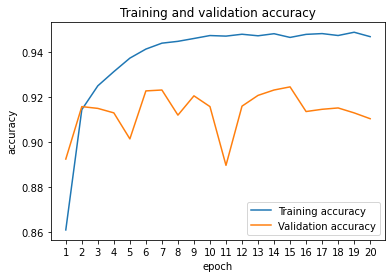

In [25]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc,  label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

Now, let's check the accuracy of model on test set, which is done by calling `evaluate` method on model. We will also defin `batch_size` parameter here.

In [26]:
test_loss, test_accuracy = model.evaluate(test_images.reshape(-1,28,28,1), test_labels,   batch_size=128)
print('Accuracy on test dataset:', test_accuracy)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Visualizing the activation maps of  convolutional layers

In this section we will plot the activation maps of a particular CNN layer. Visualizing the activation of individual layer helps to understand how the input is decomposed into some relevant pixel patterns within an image or in other words, what local patterns the layer is learning. 

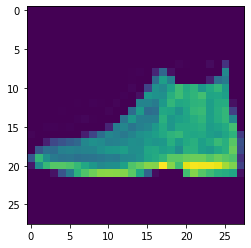

In [40]:
# display the image whose feature map we will visualize
plt.imshow(test_images[0]);

In [41]:
# extract the outputs from all layers:
layer_outputs = [layer.output for layer in model.layers]

# create a model that will return these outputs, given the model input:
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

# return feature maps of the first training image
activation = activation_model.predict(test_images[0].reshape(1, 28, 28, 1))

Let's take an activation of first convolution layer for our input.

In [42]:
first_layer_activation = activation[0] 
print(first_layer_activation.shape)

(1, 28, 28, 32)


The output of the first convolution layer are "images" of size $28 \times 28 \times 32$. Instead of only three channels (red,green,blue) this image has $32$ channels which correspond to the different reference patters (kernel) we compare the input image with. The code snippet below displays the first and third channel of this image. 

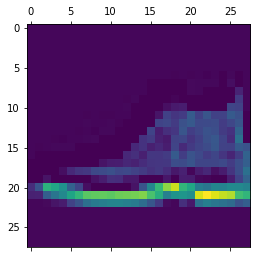

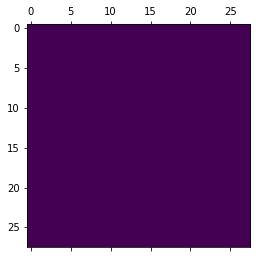

In [43]:
channels = [1,3] # select first and third channels 
for channel in channels:
    plt.matshow(first_layer_activation[0, :, :, channel], cmap='viridis')
    plt.show()

Each filter encodes relatively independent features of the input image. We can see that first convolutional layer has learned lower level features/pattern from the image, such as various edges. \
Now, let's go deeper into the network and select the feature maps of the 5th layer.

In [44]:
fifth_layer_activation = activation[4] 
print(fifth_layer_activation .shape)

(1, 14, 14, 64)


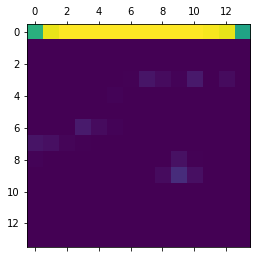

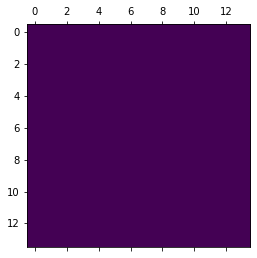

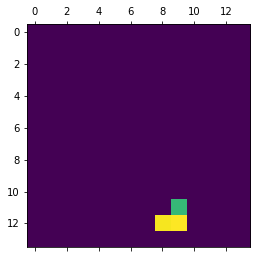

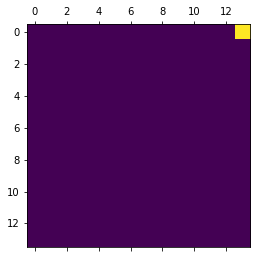

In [45]:
channels = [10, 20, 32,63] # select channels to plot
for channel in channels:
    plt.matshow(fifth_layer_activation[0, :, :, channel], cmap='viridis')
    plt.show()

Activations from deeper layers reveals that as we go deeper into the network, the feature learned becomes less visually interpretable, meaning encoding the higher level feature/pattern of an object.

**student feedback - explain what the higher level feature of object mean ?** 

## Predication Accurarcy on Test Set 

In [46]:
#get the predictions for the test data
predicted_classes = model.predict_classes(test_images.reshape(-1,28,28,1))
#get true test_label
y_true=test_labels

In [47]:
#to get the total correct and incorrect prediction from the predict class
correct=np.nonzero(predicted_classes==y_true)[0]
correct.shape[0]
incorrect=np.nonzero(predicted_classes!=y_true)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9091
Incorrect predicted classes: 909


In [48]:
# let's map each images labels to item name

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [49]:
target_names = ["Class {} ({}) :".format(i,class_names[i]) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.85      0.89      0.87      1000
    Class 1 (Trouser) :       0.99      0.98      0.99      1000
   Class 2 (Pullover) :       0.88      0.84      0.86      1000
      Class 3 (Dress) :       0.89      0.94      0.91      1000
       Class 4 (Coat) :       0.87      0.83      0.85      1000
     Class 5 (Sandal) :       0.97      0.97      0.97      1000
      Class 6 (Shirt) :       0.73      0.75      0.74      1000
    Class 7 (Sneaker) :       0.96      0.96      0.96      1000
        Class 8 (Bag) :       0.99      0.97      0.98      1000
 Class 9 (Ankle boot) :       0.96      0.96      0.96      1000

               accuracy                           0.91     10000
              macro avg       0.91      0.91      0.91     10000
           weighted avg       0.91      0.91      0.91     10000



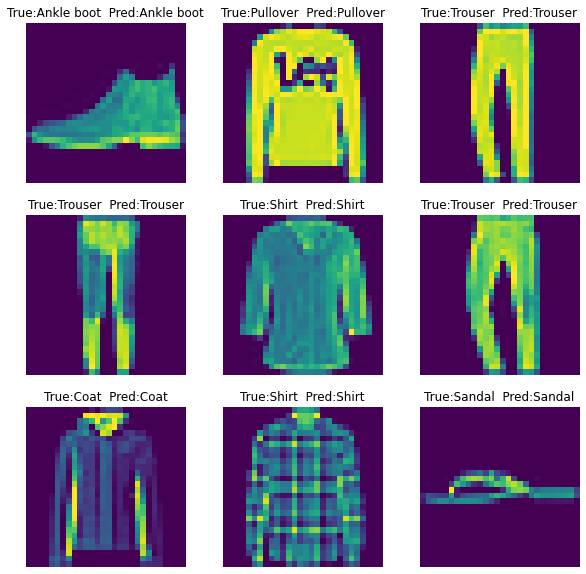

In [50]:
def plot_images(data_index):
    '''
        function to plot first 9 images.    
        data_index: indices of images.
    
    '''
    # plot the sample images 
    f, ax = plt.subplots(3,3, figsize=(10,10))

    for i, indx in enumerate(data_index[:9]):
        ax[i//3, i%3].imshow(test_images[indx].reshape(28,28))
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title("True:{}  Pred:{}".format(class_names[test_labels[indx]],class_names[predicted_classes[indx]]))
    plt.show()    
    
plot_images(correct)

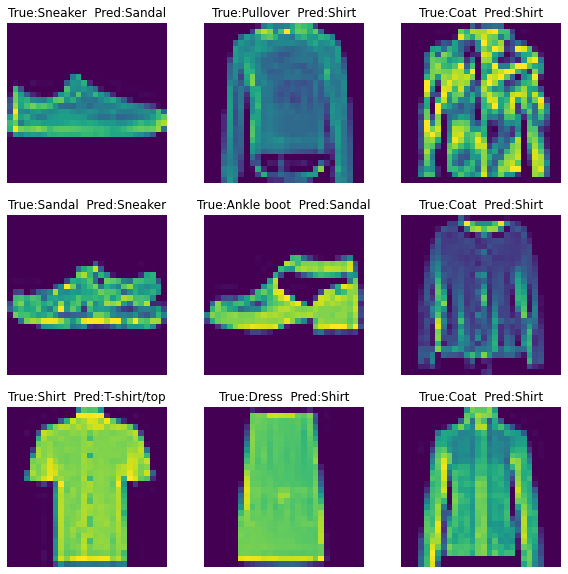

In [51]:
plot_images(incorrect)